In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm

# Ejercicio 2.1

In [2]:
DATA_DIR = '../data/images/'

In [3]:
def img2vec(path, size=(64, 64)):
    image = cv2.imread(path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert to RGB
    image = cv2.resize(image, size)  
    # plot image
    plt.imshow(image)
    vector = image.reshape(-1, image.shape[-1]) # Vector [R, G, B]
    return vector, image


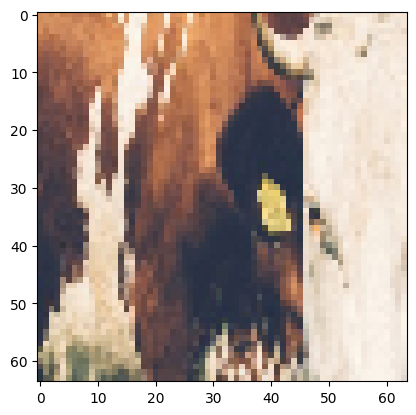

In [4]:
(vaca, _), (cielo, _), (pasto, _) = [img2vec(os.path.join(DATA_DIR, f)) for f in os.listdir(DATA_DIR)]

In [5]:
vaca

array([[169, 187, 197],
       [175, 192, 202],
       [174, 191, 199],
       ...,
       [199, 210, 216],
       [197, 208, 212],
       [198, 209, 213]], dtype=uint8)

In [6]:
X = np.concatenate((vaca, cielo, pasto)) # array of rgb pixels
print(X.shape) # (12288, 3) = (64px x 64px x 3img, 3=rgb)
X

(12288, 3)


array([[169, 187, 197],
       [175, 192, 202],
       [174, 191, 199],
       ...,
       [249, 240, 231],
       [242, 232, 223],
       [224, 216, 207]], dtype=uint8)

In [11]:
y = np.array([0] * len(vaca) + [1] * len(cielo) + [2] * len(pasto)) # 0: vaca, 1: cielo, 2: pasto
y # label for each pixel

array([0, 0, 0, ..., 2, 2, 2])

In [8]:
assert X.shape[0] == y.shape[0]

C:\Users\ezequ\AppData\Local\Temp\ipykernel_13584\1236228807.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(y) + 1)


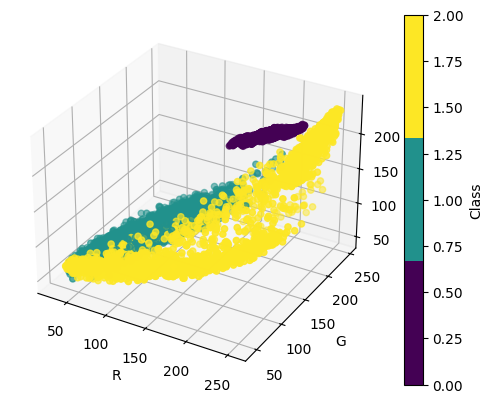

In [14]:
# Create a colormap based on labels
cmap = cm.get_cmap('viridis', max(y) + 1)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from the points
r = [point[0] for point in X]
g = [point[1] for point in X]
b = [point[2] for point in X]

# Plot the 3D points with colors based on labels
sc = ax.scatter(r, g, b, c=y, cmap=cmap, marker='o')

# Add labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

# Add a colorbar to the plot to show the mapping between labels and colors
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Class')

# Show the plot
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Search for best parameters
param_grid = [
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4],  # Different polynomial degrees to compare
        'C': [0.1, 1.0, 10.0, 100]  # Different C values for the polynomial kernel
    },
    {
        'kernel': ['rbf'],
        'gamma': [0.00001, 0.0001, 0.001, 0.01],  # Different gamma values for the RBF kernel
        'C': [0.1, 1.0, 10.0, 100]  # Different C values for the RBF kernel
    }
]

svc = SVC()

# 5-fold cross-validation, get the best parameters maximizing the accuracy
clf = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)
print('Best score found:\n', clf.best_score_)
print('Best estimator found:\n', clf.best_estimator_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


Best parameters found:
 {'C': 10.0, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score found:
 0.9901322482197354
Best estimator found:
 SVC(C=10.0, gamma=0.0001)


In [97]:
kernels = [
    { "name": "poly", "params": [2, 3, 4] },
    { "name": "rbf", "params": [0.00001, 0.0001, 0.001] },
]
c_values = [1.0, 10.0]

predictions = []

for c in c_values:
    for kernel in kernels:
        for param in kernel["params"]:
            # Create an SVM classifier
            if kernel["name"] == "poly":
                clf = SVC(kernel=kernel["name"], degree=param, C=c, random_state=42)
            else:
                clf = SVC(kernel=kernel["name"], gamma=param, C=c, random_state=42)

            # Train the model using the training sets
            clf.fit(X_train, y_train)

            # Predict the response for test dataset
            y_hat = clf.predict(X_test)

            # Confusion matrix
            cm = confusion_matrix(y_test, y_hat)

            # Accuracy
            accuracy = accuracy_score(y_test, y_hat)

            predictions.append({'kernel': kernel["name"], 'param': param, 'c': c, 'accuracy': accuracy, 'confusion matrix': cm})

In [98]:
predictions

[{'kernel': 'poly',
  'param': 2,
  'c': 1.0,
  'accuracy': 0.9890154597233524,
  'confusion matrix': array([[844,   0,   0],
         [  0, 791,  19],
         [  0,   8, 796]], dtype=int64)},
 {'kernel': 'poly',
  'param': 3,
  'c': 1.0,
  'accuracy': 0.9877949552481693,
  'confusion matrix': array([[844,   0,   0],
         [  0, 790,  20],
         [  0,  10, 794]], dtype=int64)},
 {'kernel': 'poly',
  'param': 4,
  'c': 1.0,
  'accuracy': 0.9857607811228641,
  'confusion matrix': array([[844,   0,   0],
         [  0, 785,  25],
         [  0,  10, 794]], dtype=int64)},
 {'kernel': 'rbf',
  'param': 1e-05,
  'c': 1.0,
  'accuracy': 0.9857607811228641,
  'confusion matrix': array([[844,   0,   0],
         [  0, 793,  17],
         [  2,  16, 786]], dtype=int64)},
 {'kernel': 'rbf',
  'param': 0.0001,
  'c': 1.0,
  'accuracy': 0.9869812855980472,
  'confusion matrix': array([[844,   0,   0],
         [  0, 795,  15],
         [  0,  17, 787]], dtype=int64)},
 {'kernel': 'rbf',
  'p

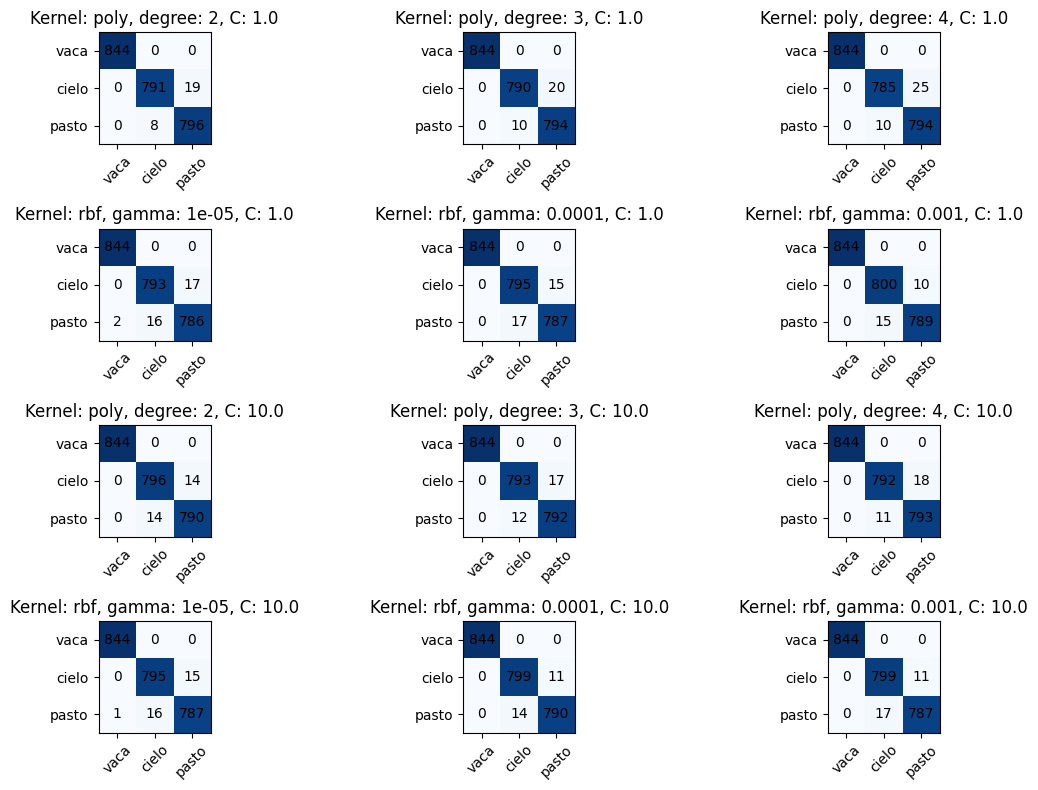

In [99]:
plt.figure(figsize=(12, 8))

labels = ["vaca", "cielo", "pasto"]

for i, pred in enumerate(predictions):
    kernel = pred['kernel']
    param = pred['param']
    c = pred['c']
    cm = pred['confusion matrix']
    
    # Subplot for each kernel and C value
    plt.subplot(len(kernels) * len(c_values), len(kernels[0]["params"]), i + 1)
    
    # Title for each subplot
    param_name = 'degree' if kernel == 'poly' else 'gamma'
    plt.title(f'Kernel: {kernel}, {param_name}: {param}, C: {c}')
    
    # Visualize confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    
    # Add ticks to the plot
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    
    # Add numbers to the plot
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

# Ejercicio 2.d

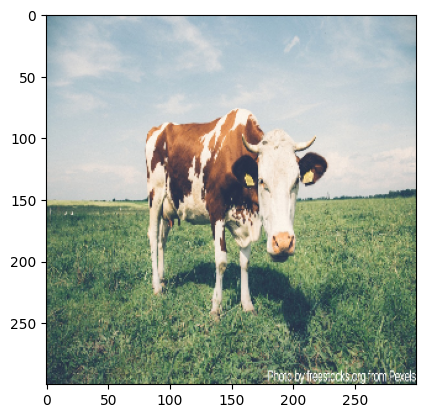

In [100]:
cow_vec, cow_img = img2vec('../data/cow.jpg', size=(300, 300))


In [101]:
cow_vec

array([[103, 140, 156],
       [102, 139, 155],
       [110, 146, 160],
       ...,
       [ 41,  62,  74],
       [ 47,  70,  67],
       [ 52,  82,  79]], dtype=uint8)

In [103]:
# Create an SVM classifier with the best parameters found
clf = SVC(kernel='rbf', C=10.0, gamma=0.0001, random_state=42)

## Deciding on the optimal split ratio

- We iterate through the different split ratios, performing a random train-test split for each ratio.

- For each split, we apply 5-fold cross-validation on the training data (X_train, y_train) and calculate the mean accuracy score.

- We keep track of the best split ratio and its corresponding score. The split ratio with the highest mean accuracy score is considered the best.

In [104]:
# Define a range of train-test split ratios to evaluate
split_ratios = np.linspace(0.1, 0.7, 7)

best_split_ratio = None
best_score = 0

for split_ratio in split_ratios:
    # if you don't use `stratify`, you may end up with an imbalanced distribution of each class' examples between the training and testing sets.
    # `stratify=y` helps ensure that the class distribution is roughly the same in both sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42, stratify=y)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_split_ratio = split_ratio

print(f"Best Split Ratio: {best_split_ratio}")
print(f"Best Score: {best_score}")

Best Split Ratio: 0.3
Best Score: 0.9901174952366796


In [105]:
# Split the data into training and testing sets, with the best split ratio found
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [106]:
clf.fit(X_train, y_train)

SVC(C=10.0, gamma=0.0001, random_state=42)

In [107]:
y_hat = clf.predict(cow_vec)
y_hat

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
colors = (np.array([255, 255, 255]), np.array([0, 0, 0]), np.array([127, 127, 127])) # Colors for each class, colors[0] = white, colors[1] = black, colors[2] = grey 0.5019607843137255

In [109]:
# Create a new image with the same size as the original one
# If y_hat[i] = 0, the pixel will be white
# If y_hat[i] = 1, the pixel will be black
# If y_hat[i] = 2, the pixel will be grey
new_image = np.array([colors[label] for label in y_hat])
new_image

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [110]:
assert new_image.shape == cow_vec.shape

In [111]:
new_image

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

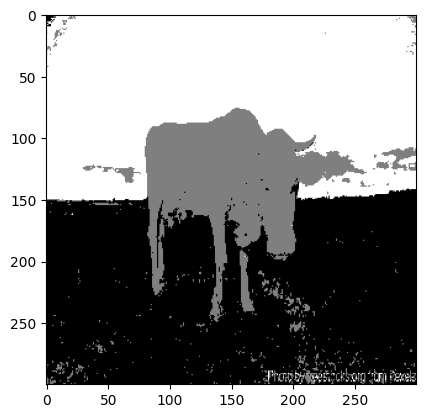

In [112]:
# Plot the new image
plt.imshow(new_image.reshape(cow_img.shape))

# Ejercicio 2.g

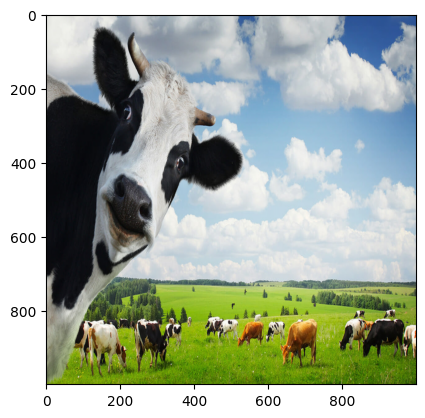

In [113]:
cow_vec, cow_img = img2vec('../data/cow3.jpg', size=(1000, 1000))

In [115]:
y_hat = clf.predict(cow_vec)
y_hat

array([0, 0, 0, ..., 1, 1, 1])

In [116]:
colors = (np.array([255, 255, 255]), np.array([0, 0, 0]), np.array([127, 127, 127])) # Colors for each class, colors[0] = white, colors[1] = black, colors[2] = grey 0.5019607843137255

In [117]:
# Create a new image with the same size as the original one
# If y_hat[i] = 0, the pixel will be white
# If y_hat[i] = 1, the pixel will be black
# If y_hat[i] = 2, the pixel will be grey
new_image = np.array([colors[label] for label in y_hat])
new_image

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]])

In [118]:
assert new_image.shape == cow_vec.shape

In [119]:
new_image

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]])

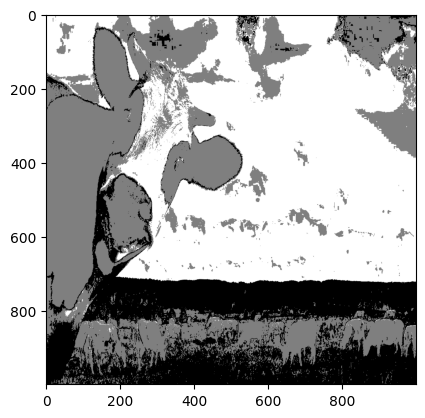

In [120]:
# Plot the new image
plt.imshow(new_image.reshape(cow_img.shape))